# Data Visualization: A Day in the Life of Air Traffic In America

**Tom Darby**  
**Data Science**  
**Spring 2020** 
**Assignment 2**  

For this assignment, we'll be using Python to map out a day's worth of recorded air traffic from a publicly available database. 

Major points of learning for this project included familiarizing myself with the basics of pandas, which is strikingly similar to working with data frames in R. Additionally, I learned how to plot simple map projections using a library called `cartopy`.

## Supporting Libraries

For this assignment, we're going to be using the `cartopy` library, which needs to be installed with `conda`:

    conda install -c anaconda cartopy
    
First, we're going to import our libraries and load our data. For libraries, we'll be using a few common libraries, like `matplotlib` and `pandas`, as well as `cartopy`, a library designed to enhance `matplotlib` with cartographic functionality.

## Dataset

Our dataset is a single day's worth of global flight data. We downloaded this data from the OpenSky Network's publicly available dataset repository at https://opensky-network.org/datasets/.

The data was gathered by automatic dependent surveillance—broadcast systems, or ADS-B. ADS-B is a system for broadcasting telemetry data at regular intervals from virtually all modern passenger aircraft. Stations on the ground can listen for and record this data; from there, they can send data to central servers (like the Opensky Network) for collation and distribution.

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

flightDataTable = pd.read_csv('states_2020-01-20-04.csv')
print(flightDataTable.head())

         time  icao24        lat       lon    velocity     heading  vertrate  \
0  1579492800  a55e46  50.848709  3.820941  219.557322  105.631904   0.00000   
1  1579492800  484444  49.691757  5.217928  201.977423  343.272800   0.00000   
2  1579492800  a2e813  52.177917  4.727325  227.457562  121.497139  -0.32512   
3  1579492800  406ec9  52.554291  4.189606  275.550441  238.357459   0.00000   
4  1579492800  400612  49.332337  2.416125  222.442754  336.992801   0.00000   

   callsign  onground  alert    spi  squawk  baroaltitude  geoaltitude  \
0  GTI8502      False  False  False  1176.0       11582.4     11765.28   
1  KLM588       False  False  False  6760.0       12192.0     12313.92   
2  AAL716       False  False  False  2256.0       11887.2     12115.80   
3  BAW28        False  False  False  3526.0       10972.8     11239.50   
4  BAW58L       False  False  False  6757.0       11582.4     11765.28   

   lastposupdate   lastcontact  
0   1.579493e+09  1.579493e+09  
1   1.57

call signs: 0


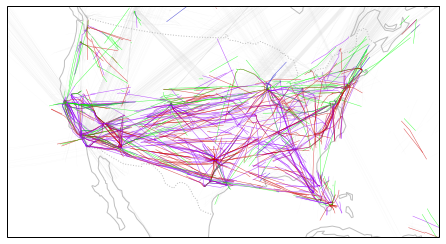

In [3]:
# MatPlotLib/cartopy initialization code taken from https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='#C0C0C0')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='#C0C0C0')


# Axes extent for continental US taken from https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Original code follows

count=0
for flightCallsign in flightDataTable.callsign.unique():
    lineColor = '#C0C0C0'
    if (isinstance(flightCallsign, str) == False):
        # no callsign!
        lineColor = '#C0C0C0'
    elif (flightCallsign[:2] == 'WN' or flightCallsign[:2] == 'SW'):
        # Southwest Airlines
        lineColor = '#9900FF'
    elif (flightCallsign[:2] == 'AA'):
        # American Airlines
        lineColor = '#CC0000'
    elif (flightCallsign[:2] == 'DL'):
        # Delta Airlines
        lineColor = '#0000CC'
    elif (flightCallsign[:2] == 'UA'):
        # United Airlines
        lineColor = '#00FF00'
    if (lineColor != '#C0C0C0'):
        # plot the four major US carriers with wider lines and higher alpha...
        plt.plot(flightDataTable[flightDataTable['callsign']==flightCallsign]['lon'], flightDataTable[flightDataTable['callsign']==flightCallsign]['lat'], color=lineColor, alpha=0.66, linewidth=0.5, transform=ccrs.Geodetic())
    else:
        # ...and everything else with thinner lines and lower alpha.
        plt.plot(flightDataTable[flightDataTable['callsign']==flightCallsign]['lon'], flightDataTable[flightDataTable['callsign']==flightCallsign]['lat'], color=lineColor, alpha=0.25, linewidth=0.1, transform=ccrs.Geodetic())
        
print("call signs: " + str(count))

plt.savefig('flightpaths.svg', format='svg')
plt.show()

# Conclusions and Issues

In the end, we get a nice-looking map of the United States with a series of lines representing the flight paths of various commercial aircraft for the 20th of January, 2020. 

While this visualization is clearly representing flight paths over the US, there are some obvious issues with the data, including:

- **Missing Flights.** There's obviously some discrepancy between the reality of air travel in the United States and what's represented on this map. For starters, Seattle-Tacoma airport handles *far* more major passenger carrier traffic on a daily basis than what appears to be represented on this map.

- **Broken Flight Lines.** There are flights that appear never to reach their destinations, and flights that appear to begin and end in the middle of the ocean, and entire regions of the country that are completely devoid of major carrier traffic. Some of these may well be flights that are in process at the beginning or end of the data period, others may be gaps in available transponder data, others still may simply be missing from the database we're using.

- **Strange Line Behavior.** There appears to be a *massive* amount of traffic going into and coming out of Calgary, Canada. Many of these flights are light grey, indicating other carriers, and a large number of these flights seem to "bounce" off the 40th parallel around the vicinity of Kansas. I'm not sure what's going on here, and additional research would need to be performed to see why this is happening.


*Bibliography/Research Sources:*
    
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

shttps://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states

https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

https://scitools.org.uk/cartopy/docs/v0.15/examples/features.html

https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

https://matplotlib.org/gallery/lines_bars_and_markers/eventcollection_demo.html#sphx-glr-gallery-lines-bars-and-markers-eventcollection-demo-py

https://pandas.pydata.org/pandas-docs/version/0.9.1/visualization.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

http://ryan-m-cooper.com/blog/gps-points-to-line-segments.html

https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.htmlhttps://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

https://stackoverflow.com/questions/4843173/how-to-check-if-type-of-a-variable-is-string

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
